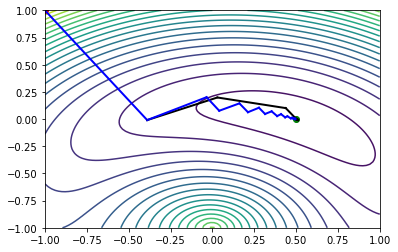

In [10]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as sopt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy import linalg as LA
from time import time 
from mpl_toolkits import mplot3d



# Funcion 
def f(x):
    fx = 100*(np.sqrt(x[0]**2+(x[1]+1)**2)-1)**2 + 90*(np.sqrt(x[0]**2+(x[1]+1)**2)-1)**2 -(20*x[0]+40*x[1])
    return fx

#Metodo para obtener el gradiente mediante las aproximadas
def gradiente(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

# Metodo para realizar la matriz Hessiana utilizando las formulas aproximadas
def matrizHessiana(x,delta):
    hessiana=np.zeros([2,2])
    hessiana[0,0]= ( f([x[0]+delta,x[1]])  - 2*f(x) + f([x[0]-delta,x[1]]) )/ delta**2;
    hessiana[1,1]= ( f([x[0],x[1]+delta])  - 2*f(x) + f([x[0],x[1]-delta]) )/ delta**2; 
    hessiana[0,1]= ( f([x[0]+delta,x[1]+delta]) - f([x[0]+delta,x[1]-delta]) - f([x[0]-delta,x[1]+delta]) + f([x[0]-delta,x[1]-delta]) )/ (4*(delta**2));
    hessiana[1,0]=hessiana[0,1]
    return hessiana

def busquedaSeccionDorada(x, dire,error):
    a = -1
    b = 1
    tau = 0.381967
    #error = 1e-3

    alpha1 = a*(1 - tau) + b*tau
    alpha2 = a*tau + b*(1 - tau)
    Ualpha1 = f(x + alpha1*dire)
    Ualpha2 = f(x + alpha2*dire)


    for _ in range(0, 1000):
        if Ualpha1 > Ualpha2:

            a = alpha1
            alpha1 = alpha2

            Ualpha1 = Ualpha2
            alpha2 = tau*a + (1 - tau)*b

            Ualpha2 = f(x + alpha2*dire)

        else:
            b = alpha2
            alpha2  = alpha1
            Ualpha2 = Ualpha1

            alpha1  = tau*b + (1 - tau)*a
            Ualpha1 = f(x + alpha1*dire)

        if abs(f(x + alpha1*dire) - f(x + alpha2*dire)) < error:
            break;
    return alpha1, Ualpha1

#-----------------------------------------------------
# Graficas

dx=1e-3 
error1=1e-3
error2=1e-3
x = [-1,1]
xg = [-1, 1]

f_prev=f(x)

#delta=1e-3 
#eps=1e-3 
#xlim = [-1,1]

xp = [-1,1]
fx_prev=f(x)
x1 = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x1, y)
z = 100*(np.sqrt(xx**2+(yy+1)**2)-1)**2 + 90*(np.sqrt(xx**2+(yy+1)**2)-1)**2 -(20*xx+40*yy)
plt.contour(x1,y,z,20)
plt.plot(-1,1, 'ro--', linewidth=2, markersize=6)
plt.plot(0.5,0, 'go--', linewidth=2, markersize=6)

gradp=gradiente(xp,dx)
si_prev = -gradp
alpha,fx_prev = busquedaSeccionDorada(xp,si_prev,error1);
xc = xp + alpha*si_prev
xcg = xg + alpha*si_prev
plt.plot([xg[0],xcg[0]],[xg[1],xcg[1]], 'b', linewidth=2,)
xg = xcg

for i in range(20):
    gradc=gradiente(xc,dx)
    si_c = - gradc +((la.norm(gradc)**2)/(la.norm(gradp)**2))*si_prev;
    alpha,fx_curr = busquedaSeccionDorada(xc,si_c,error2);           
            
    xp=xc
    xc = xp + alpha*si_c
    si_prev=si_c
    gradp=gradc
    plt.plot([xp[0],xc[0]],[xp[1],xc[1]], 'k', linewidth=2,)
    si_cg = -gradiente(xcg, dx)
    alpha,fx_curr = busquedaSeccionDorada(xcg,si_cg,error2);
    xcg = xg + alpha*si_cg
    plt.plot([xg[0],xcg[0]],[xg[1],xcg[1]], 'b', linewidth=2,)
    xg = xcg
    if abs(fx_curr-fx_prev)<error1 or la.norm(gradc)<error2:
        break;

plt.show()